# Segmenting and Clustering Neighborhoods in Toronto

### IBM Data Science Professional Certificate

Let's import useful packages:

In [ ]:
import pandas as pd

### Pre processing the data

We are going to use the postal codes of Toronto. 

Unfortunately, there is no dataset of it. However, wikipedia has it!

Let's obtain it and convert to a pandas dataframe!

In [ ]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
postal_codes = pd.DataFrame(table[0])
postal_codes.head()

We don't want to use postal codes that doesn't have a assigned Borough, so we need to filter our dataframe.

In [ ]:
postal_codes = postal_codes[postal_codes['Borough'] != 'Not assigned'].reset_index(drop=True)
print('Our dataframe contains',postal_codes.shape[0], 'cells!')
postal_codes.head()

Some Neighborhoods are not assigned. In order to solve this, we are going to assign the name of the corresponding Borough to those Neighborhoods.

In [ ]:
for i in range(len(postal_codes)):
    if postal_codes['Neighborhood'][i] == 'Not assigned':
        postal_codes['Neighborhood'][i] = postal_codes['Borough'][i]

We need to check if code is correct:

In [ ]:
print('Number of cells now: ', postal_codes.shape[0])
postal_codes = postal_codes[postal_codes['Neighborhood'] != 'Not assigned']
print('Number of cells excluding possible "not assigned" cells: ', postal_codes.shape[0])

we can see that the number of cells before filtering possible 'Not assigned' cells are equal after the exclusion.

Now we have to group the Neighborhoods by postcodes. 

Firstly, we sort ou dataframe by postcode.

In [152]:
postal_codes.sort_values(by=['Postcode'],axis=0, inplace=True)
postal_codes.reset_index(inplace=True,drop=True)
postal_codes.head(10)

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,Rouge
1,M1B,Scarborough,Malvern
2,M1C,Scarborough,Port Union
3,M1C,Scarborough,Rouge Hill
4,M1C,Scarborough,Highland Creek
5,M1E,Scarborough,Guildwood
6,M1E,Scarborough,Morningside
7,M1E,Scarborough,West Hill
8,M1G,Scarborough,Woburn
9,M1H,Scarborough,Cedarbrae


We will need a auxiliar dataframe to later merge our lists. You will understand it later ;)

In [161]:
postal_codes_new = postal_codes[['Postcode','Borough']]
postal_codes_new.drop_duplicates(inplace=True)
postal_codes_new.reset_index(inplace=True, drop=True)
postal_codes_new

C:\Users\lucas.carlini\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Postcode,Borough
0,M1B,Scarborough
1,M1C,Scarborough
2,M1E,Scarborough
3,M1G,Scarborough
4,M1H,Scarborough
...,...,...
98,M9N,York
99,M9P,Etobicoke
100,M9R,Etobicoke
101,M9V,Etobicoke


In [ ]:
postcode = postal_codes.Postcode.unique()
postcode

In [154]:
neighborhoods = []
range_ = len(postal_codes)-1
i = 0
while i < 210:
    j = i + 1
    aux = postal_codes['Neighborhood'][i]
    if i < 209:
        if postal_codes['Postcode'][j] == postal_codes['Postcode'][i]:
            while postal_codes['Postcode'][j] == postal_codes['Postcode'][i]:
                aux = aux + ', ' + postal_codes['Neighborhood'][j]
                j = j + 1
            i = j
        else:
            i = i + 1
    else:
        i = i + 1
    neighborhoods.append(aux)

len(neighborhoods)

103

We can see that our code is correct because the length of 'coder' is equal to the length of 'neighborhoods'.

Checking the 'neighborhoods' list:

In [153]:
neighborhoods[0:10]

['Rouge, Malvern',
 'Port Union, Rouge Hill, Highland Creek',
 'Guildwood, Morningside, West Hill',
 'Woburn',
 'Cedarbrae',
 'Scarborough Village',
 'East Birchmount Park, Ionview, Kennedy Park',
 'Golden Mile, Oakridge, Clairlea',
 'Cliffcrest, Scarborough Village West, Cliffside',
 'Cliffside West, Birch Cliff']

then, let's insert the neighborhoods list into our new postal codes dataframe:

In [162]:
postal_codes_new.insert(2, 'Neighborhood', neighborhoods)
postal_codes_new.head()

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Port Union, Rouge Hill, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [164]:
postal_codes_new.shape

(103, 3)

We are going to use the given csv file which has the coordinates for each postal code and rename the column name:

In [178]:
coord = pd.read_csv('Geospatial_Coordinates.csv')
coord.rename(columns={'Postal Code': 'Postcode'}, inplace=True)
coord.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [185]:
postal_codes_new = postal_codes_new.merge(coord, left_on='Postcode', right_on='Postcode')
postal_codes_new.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Port Union, Rouge Hill, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


Since we are going to analyse Toronto City, we need to filter our dataset:

In [257]:
toronto = postal_codes_new[postal_codes_new['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


### Clustering Toronto Boroughs

In [258]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import numpy as np

We will get toronto coordinates and then will plot its map with the corresponding neighborhood and borough:

In [280]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude

In [260]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto['Latitude'], toronto['Longitude'], toronto['Borough'], toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [208]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now, we are going to cluster each borough by its postal code!

First, let's get venues using the Foursquare API

In [202]:
CLIENT_ID = 'M4OAEWZU4YKT1G4TL2IFWLWFE5W5S45EFFE0X4FVA1YHCNEC' # your Foursquare ID
CLIENT_SECRET = 'AGIBLIFO5BZRAHVIPNK31PJIWRBWHR5EHOLWFZAQREBUFBUQ' # your Foursquare Secret
VERSION = '20193012' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [229]:
toronto_venues = getNearbyVenues(names=toronto['Borough'],
                                   latitudes=toronto['Latitude'],
                                   longitudes=toronto['Longitude']
                                  )
print('Finished!')

Finished!


We need to have the neighborhood for Borough based on corresponding coordenates, so we are going to use a merge function, as we did before.

In [230]:
print(toronto_venues.shape)
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

toronto_venues = toronto_venues.merge(toronto.drop('Borough',axis=1), left_on=['Borough Latitude','Borough Longitude'], right_on=['Latitude','Longitude'])

toronto_venues.head()

(1709, 7)
There are 236 uniques categories.


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Postcode,Neighborhood,Latitude,Longitude
0,East Toronto,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail,M4E,The Beaches,43.676357,-79.293031
1,East Toronto,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store,M4E,The Beaches,43.676357,-79.293031
2,East Toronto,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub,M4E,The Beaches,43.676357,-79.293031
3,East Toronto,43.676357,-79.293031,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors,M4E,The Beaches,43.676357,-79.293031
4,East Toronto,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood,M4E,The Beaches,43.676357,-79.293031


Our merge function give us some repeated columns, we need to clean it:

In [231]:
toronto_venues.drop(['Borough Latitude', 'Borough Longitude'], axis=1, inplace=True)
toronto_venues.head()

,Borough,Venue,Venue Latitude,Venue Longitude,Venue Category,Postcode,Neighborhood,Latitude,Longitude
0,East Toronto,Glen Manor Ravine,43.676821,-79.293942,Trail,M4E,The Beaches,43.676357,-79.293031
1,East Toronto,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store,M4E,The Beaches,43.676357,-79.293031
2,East Toronto,Grover Pub and Grub,43.679181,-79.297215,Pub,M4E,The Beaches,43.676357,-79.293031
3,East Toronto,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors,M4E,The Beaches,43.676357,-79.293031
4,East Toronto,Upper Beaches,43.680563,-79.292869,Neighborhood,M4E,The Beaches,43.676357,-79.293031


Analysing each Borough:

In [239]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.drop('Neighborhood', axis=1, inplace=True)
toronto_onehot.insert(0,'Neighborhood', toronto_venues['Neighborhood'])

toronto_onehot.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Adelaide, Richmond, King",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020000,0.0,...,0.0,0.0,0.0,0.020000,0.0,0.0,0.010000,0.0,0.01,0.000000
1,Berczy Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.018182,0.0,0.0,0.000000,0.0,0.00,0.000000
2,Business Reply Mail Processing Centre 969 Eastern,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000
3,Central Bay Street,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011905,0.0,...,0.0,0.0,0.0,0.011905,0.0,0.0,0.011905,0.0,0.00,0.011905
4,Christie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000


In [243]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [286]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, Richmond, King",Coffee Shop,Café,Bar,Steakhouse,Sushi Restaurant,Burger Joint,Hotel,Asian Restaurant,Thai Restaurant,Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Steakhouse,Bakery,Farmers Market,Cheese Shop,Café,Restaurant
2,Business Reply Mail Processing Centre 969 Eastern,Recording Studio,Garden,Smoke Shop,Light Rail Station,Spa,Farmers Market,Fast Food Restaurant,Burrito Place,Restaurant,Skate Park
3,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Burger Joint,Ice Cream Shop,Japanese Restaurant,Juice Bar,Salad Place,Bubble Tea Shop
4,Christie,Grocery Store,Café,Park,Athletics & Sports,Coffee Shop,Nightclub,Diner,Restaurant,Candy Store,Italian Restaurant
5,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar,Pub,Pizza Place,Men's Store,Mediterranean Restaurant,Hotel
6,"Commerce Court, Victoria Hotel",Coffee Shop,Café,Hotel,Restaurant,Italian Restaurant,Seafood Restaurant,Gastropub,Steakhouse,American Restaurant,Gym
7,Davisville,Pizza Place,Sandwich Place,Dessert Shop,Italian Restaurant,Gym,Sushi Restaurant,Coffee Shop,Café,Farmers Market,Indian Restaurant
8,Davisville North,Hotel,Park,Food & Drink Shop,Sandwich Place,Clothing Store,Breakfast Spot,Pizza Place,Gym,Cosmetics Shop,Dog Run
9,"Dufferin, Dovercourt Village",Pharmacy,Supermarket,Bakery,Park,Middle Eastern Restaurant,Smoke Shop,Brazilian Restaurant,Café,Gym / Fitness Center,Bar


Finally, we are clustering our neighborhoods!

In [282]:
distortions = []

K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmeanModel.fit(toronto_grouped_clustering)
    distortions.append(kmeanModel.inertia_)


<Figure size 700x500 with 1 Axes>

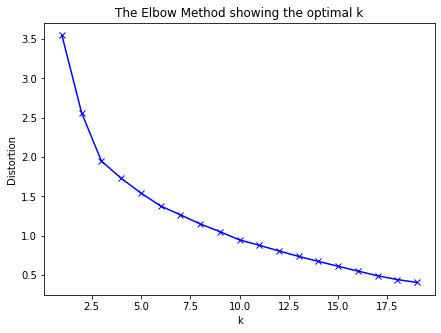

In [283]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [284]:
# set number of clusters
kclusters = 3

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [285]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

ValueError: cannot insert Cluster Labels, already exists

In [279]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters